In [1]:
import json
import re
import functools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

In [3]:
METRICS = [f'test_rouge_{i}_f1' for i in ['1', '2', '3', 'L']]
METRICS

['test_rouge_1_f1', 'test_rouge_2_f1', 'test_rouge_3_f1', 'test_rouge_L_f1']

In [4]:
def load_csv(csv_path):
    df = pd.read_csv(csv_path)
    df = df.drop([col for col in df.columns if '_step' in col], axis=1) # drop training step number columns
    df = df.replace('undefined', 0.0)
    df = df.astype('float64')
    
    return df

df = load_csv('../reports/thesis/tables/test_rouge_L_f1_part1.csv')
df.head()

,epoch,rs_1_09 - test_rouge_L_f1,rs_1_08 - test_rouge_L_f1,rs_1_13 - test_rouge_L_f1,rs_1_12 - test_rouge_L_f1,rs_1_11 - test_rouge_L_f1,rs_1_10 - test_rouge_L_f1,rs_1_07 - test_rouge_L_f1,rs_1_06 - test_rouge_L_f1,rs_1_05 - test_rouge_L_f1,rs_1_04 - test_rouge_L_f1
0,1.0,0.248835,0.239378,0.424240,0.164319,0.478707,0.396162,0.192241,0.411260,0.177816,0.310966
1,2.0,0.298319,0.374998,0.486871,0.186104,0.523838,0.503040,0.254408,0.451513,0.219013,0.427984
2,3.0,0.318446,0.474979,0.510211,0.205533,0.513825,0.535803,0.306846,0.463835,0.264076,0.462468
3,4.0,0.324207,0.504834,0.521742,0.217778,0.522579,0.552802,0.353147,0.470170,0.316740,0.481373
4,5.0,0.263045,0.517479,0.497633,0.233040,0.534139,0.562303,0.000000,0.470495,0.358042,0.489854


In [5]:
def load_scores(metrics=METRICS):
    dfs = [
        load_csv(f'../reports/thesis/tables/{metric}_part{index}.csv').set_index('epoch')
        for metric in metrics
        for index in [1, 2]
    ]
    return functools.reduce(lambda a, b: a.join(b), dfs).reset_index() # join by epoch

df = load_scores()
df.head()

,epoch,rs_1_09 - test_rouge_1_f1,rs_1_08 - test_rouge_1_f1,rs_1_13 - test_rouge_1_f1,rs_1_12 - test_rouge_1_f1,rs_1_11 - test_rouge_1_f1,rs_1_10 - test_rouge_1_f1,rs_1_07 - test_rouge_1_f1,rs_1_06 - test_rouge_1_f1,rs_1_05 - test_rouge_1_f1,...,rs_1_19 - test_rouge_L_f1,rs_1_18 - test_rouge_L_f1,rs_1_17 - test_rouge_L_f1,rs_1_16 - test_rouge_L_f1,rs_1_15 - test_rouge_L_f1,rs_1_14 - test_rouge_L_f1,rs_1_03 - test_rouge_L_f1,rs_1_02 - test_rouge_L_f1,rs_1_01 - test_rouge_L_f1,rs_1_00 - test_rouge_L_f1
0,1.0,0.248921,0.239581,0.425084,0.164421,0.480249,0.396820,0.192362,0.412132,0.177957,...,0.164590,0.390321,0.290302,0.161964,0.446523,0.186637,0.129746,0.348637,0.180045,0.130580
1,2.0,0.298475,0.375682,0.488154,0.186155,0.525758,0.504121,0.254676,0.452723,0.219332,...,0.205149,0.482990,0.443515,0.234290,0.505359,0.243371,0.171624,0.391430,0.218718,0.140664
2,3.0,0.318584,0.475769,0.511541,0.205622,0.515664,0.536907,0.307376,0.465106,0.264635,...,0.247854,0.515661,0.481172,0.295190,0.530349,0.288407,0.188284,0.398056,0.237698,0.175947
3,4.0,0.324345,0.505747,0.523124,0.217888,0.524404,0.553961,0.353846,0.471538,0.317654,...,0.282953,0.534384,0.498331,0.343337,0.541041,0.321964,0.223618,0.403784,0.254901,0.187105
4,5.0,0.263235,0.518402,0.499089,0.233216,0.536052,0.563370,0.000000,0.471882,0.359272,...,0.313756,0.544616,0.510161,0.378932,0.546643,0.347984,0.263618,0.403481,0.269104,0.195289


In [6]:
def to_experiment_id(wandb_key):
    id = int(re.search(f'rs_1_(.*) - .*', wandb_key, re.IGNORECASE).group(1))
    return f'experiment_{id}'

to_experiment_id('rs_1_10 - test_rouge_2_f1')

'experiment_10'

In [7]:
def get_best_score(df, key, metric_name):
    best_row = df.loc[df[key].idxmax()][['epoch', key]]
    return pd.DataFrame(data={'experiment_id': [to_experiment_id(key)], 'epoch': [best_row['epoch']], metric_name: [best_row[key]]})

get_best_score(df, 'rs_1_10 - test_rouge_L_f1', 'test_rouge_L_f1')

,experiment_id,epoch,test_rouge_L_f1
0,experiment_10,10.0,0.58293


In [8]:
def get_score_at_epoch(df, epoch, key, metric_name):
    score = df[df['epoch'] == epoch][key].values[0]
    return pd.DataFrame(data={'experiment_id': [to_experiment_id(key)], metric_name: [score]})

get_score_at_epoch(df, 10, 'rs_1_10 - test_rouge_2_f1', 'test_rouge_2_f1')

,experiment_id,test_rouge_2_f1
0,experiment_10,0.336869


In [9]:
def get_best_scores(df, metric='test_rouge_L_f1'):
    return pd.concat([
        get_best_score(df, column, metric_name=metric)
        for column in df.columns
        if metric in column
    ]).sort_values(by=metric, ascending=False).set_index('experiment_id').astype({'epoch': 'int64'})

df_scores = get_best_scores(df)
df_scores

,epoch,test_rouge_L_f1
experiment_id,,
experiment_18,39,0.589901
experiment_10,10,0.582930
experiment_8,32,0.568416
experiment_5,40,0.565396
experiment_11,11,0.560674
experiment_15,11,0.560048
experiment_13,21,0.555791
experiment_17,36,0.553968
experiment_3,39,0.531127


In [10]:
def get_scores_at_epochs(df, df_pinned_epochs, metric='test_rouge_3_f1'):
    scores = []
    for column in df.columns:
        if metric in column:
            experiment_id = to_experiment_id(column)
            
            filtered_epoch = df_pinned_epochs[df_pinned_epochs['experiment_id'] == experiment_id]['epoch'].values
            if len(filtered_epoch) < 1: # cannot find experiment for some reason
                print(f'Cannot find experiment: {experiment_id}')
                scores.append([experiment_id, float('NaN')])
            else:
                epoch = filtered_epoch[0]
                score = df[df['epoch'] == epoch][column].values[0]
                scores.append([experiment_id, score])
    return pd.DataFrame(scores).rename(columns={0: 'experiment_id', 1: metric})

get_scores_at_epochs(df, df_scores.reset_index()[['experiment_id', 'epoch']])

,experiment_id,test_rouge_3_f1
0,experiment_9,0.001012
1,experiment_8,0.154672
2,experiment_13,0.146122
3,experiment_12,0.067105
4,experiment_11,0.143500
5,experiment_10,0.164219
6,experiment_7,0.029268
7,experiment_6,0.102353
8,experiment_5,0.146122
9,experiment_4,0.133454


In [11]:
def load_best_scores(leading_metric='test_rouge_L_f1', remaining_metrics=METRICS[:-1]): # by default, remanining metrics are all without the last one - test_rouge_L_f1
    df = load_scores()
    df_leading_scores = get_best_scores(df, leading_metric)
    df_pinned_epochs = df_leading_scores.reset_index()[['experiment_id', 'epoch']]
    other_scores = [
        get_scores_at_epochs(df, df_pinned_epochs, metric)
        for metric in remaining_metrics
    ]
    return functools.reduce(lambda a, b: a.merge(b), [df_leading_scores.reset_index()] + other_scores).set_index('experiment_id')

In [12]:
df_all_scores = load_best_scores()
df_all_scores

,epoch,test_rouge_L_f1,test_rouge_1_f1,test_rouge_2_f1,test_rouge_3_f1
experiment_id,,,,,
experiment_18,39,0.589901,0.591682,0.350338,0.171076
experiment_10,10,0.582930,0.583996,0.336869,0.164219
experiment_8,32,0.568416,0.569363,0.324100,0.154672
experiment_5,40,0.565396,0.567169,0.319559,0.146122
experiment_11,11,0.560674,0.562520,0.310698,0.143500
experiment_15,11,0.560048,0.560985,0.313597,0.148757
experiment_13,21,0.555791,0.557455,0.309949,0.146122
experiment_17,36,0.553968,0.555181,0.311281,0.147199
experiment_3,39,0.531127,0.532377,0.284193,0.125359


In [13]:
df_experiment_params = pd.read_json('../experiments/random_search_1.json').transpose()
df_experiment_params

,batch_size,dropout_rate,embedding_dim,latent_dim,learning_rate,max_input_seq_length,max_output_seq_length,vocabulary_size
experiment_0,512.0,0.118569,32.0,640.0,0.000192,75.0,8.0,7000.0
experiment_1,128.0,0.087517,128.0,256.0,0.000118,100.0,6.0,2000.0
experiment_2,64.0,0.185119,112.0,256.0,0.006695,125.0,5.0,5000.0
experiment_3,1024.0,0.155631,32.0,512.0,0.001129,75.0,8.0,7000.0
experiment_4,256.0,0.135776,32.0,384.0,0.005168,50.0,8.0,4000.0
experiment_5,512.0,0.094720,128.0,640.0,0.000336,150.0,7.0,2000.0
experiment_6,32.0,0.064828,112.0,1024.0,0.003592,75.0,8.0,6000.0
experiment_7,64.0,0.089990,32.0,384.0,0.000402,75.0,6.0,5000.0
experiment_8,256.0,0.042077,80.0,256.0,0.002340,175.0,5.0,3000.0
experiment_9,128.0,0.087720,96.0,1024.0,0.006250,150.0,8.0,6000.0


In [14]:
df_experiment_params.join(df_all_scores)

,batch_size,dropout_rate,embedding_dim,latent_dim,learning_rate,max_input_seq_length,max_output_seq_length,vocabulary_size,epoch,test_rouge_L_f1,test_rouge_1_f1,test_rouge_2_f1,test_rouge_3_f1
experiment_0,512.0,0.118569,32.0,640.0,0.000192,75.0,8.0,7000.0,40,0.433858,0.434976,0.188330,0.063235
experiment_1,128.0,0.087517,128.0,256.0,0.000118,100.0,6.0,2000.0,40,0.483665,0.485846,0.227260,0.081029
experiment_2,64.0,0.185119,112.0,256.0,0.006695,125.0,5.0,5000.0,4,0.403784,0.404375,0.171463,0.062439
experiment_3,1024.0,0.155631,32.0,512.0,0.001129,75.0,8.0,7000.0,39,0.531127,0.532377,0.284193,0.125359
experiment_4,256.0,0.135776,32.0,384.0,0.005168,50.0,8.0,4000.0,32,0.529455,0.531005,0.289622,0.133454
experiment_5,512.0,0.094720,128.0,640.0,0.000336,150.0,7.0,2000.0,40,0.565396,0.567169,0.319559,0.146122
experiment_6,32.0,0.064828,112.0,1024.0,0.003592,75.0,8.0,6000.0,6,0.476592,0.478074,0.240137,0.102353
experiment_7,64.0,0.089990,32.0,384.0,0.000402,75.0,6.0,5000.0,4,0.353147,0.353846,0.122582,0.029268
experiment_8,256.0,0.042077,80.0,256.0,0.002340,175.0,5.0,3000.0,32,0.568416,0.569363,0.324100,0.154672
experiment_9,128.0,0.087720,96.0,1024.0,0.006250,150.0,8.0,6000.0,4,0.324207,0.324345,0.026683,0.001012


In [15]:
def combine_scores(dfs, sort_metric='test_rouge_L_f1'):
    df = functools.reduce(lambda a, b: a.join(b, how='inner'), dfs)
    df = df.dropna()
    df = df.sort_values(by=sort_metric, ascending=False)
    df = df.round(4)
    df = df.astype({ key: 'int' for key in ['batch_size', 'embedding_dim', 'latent_dim', 'vocabulary_size', 'epoch', 'max_input_seq_length', 'max_output_seq_length']})
    df = df.astype('str') # preserve integer and float type heterogenity in columns after transpose
    df = df.transpose()
    
    return df

df_combined = combine_scores([
    df_experiment_params,
    df_all_scores,
])
df_combined

,experiment_18,experiment_10,experiment_8,experiment_5,experiment_11,experiment_15,experiment_13,experiment_17,experiment_3,experiment_14,experiment_4,experiment_16,experiment_19,experiment_1,experiment_6,experiment_12,experiment_0,experiment_2,experiment_7,experiment_9
batch_size,256,512,256,512,32,512,32,128,1024,128,256,256,128,128,32,64,512,64,64,128
dropout_rate,0.1407,0.1164,0.0421,0.0947,0.0276,0.0531,0.121,0.1106,0.1556,0.1377,0.1358,0.0019,0.1144,0.0875,0.0648,0.1676,0.1186,0.1851,0.09,0.0877
embedding_dim,80,128,80,128,48,80,48,96,32,128,32,64,96,128,112,64,32,112,32,96
latent_dim,896,768,256,640,640,1024,256,256,512,640,384,640,640,256,1024,256,640,256,384,1024
learning_rate,0.0014,0.0032,0.0023,0.0003,0.0018,0.0065,0.0013,0.0018,0.0011,0.0001,0.0052,0.0005,0.0001,0.0001,0.0036,0.0001,0.0002,0.0067,0.0004,0.0062
max_input_seq_length,50,175,175,150,175,75,125,50,75,125,50,50,50,100,75,100,75,125,75,150
max_output_seq_length,8,6,5,7,7,5,7,6,8,7,8,7,5,6,8,7,8,5,6,8
vocabulary_size,2000,7000,3000,2000,2000,4000,5000,4000,7000,5000,4000,5000,5000,2000,6000,7000,7000,5000,5000,6000
epoch,39,10,32,40,11,11,21,36,39,40,32,25,40,40,6,35,40,4,4,4
test_rouge_L_f1,0.5899,0.5829,0.5684,0.5654,0.5607,0.56,0.5558,0.554,0.5311,0.5296,0.5295,0.511,0.5013,0.4837,0.4766,0.4536,0.4339,0.4038,0.3531,0.3242


In [16]:
def pretty_format(df):
    df = df.rename(columns={ column: '#' + column.split('_')[1] for column in df.columns })
    df = df.rename(index={ key: key.replace('_', ' ').title() for key in df.index })
    
    return df

df_final = pretty_format(df_combined)
df_final

,#18,#10,#8,#5,#11,#15,#13,#17,#3,#14,#4,#16,#19,#1,#6,#12,#0,#2,#7,#9
Batch Size,256,512,256,512,32,512,32,128,1024,128,256,256,128,128,32,64,512,64,64,128
Dropout Rate,0.1407,0.1164,0.0421,0.0947,0.0276,0.0531,0.121,0.1106,0.1556,0.1377,0.1358,0.0019,0.1144,0.0875,0.0648,0.1676,0.1186,0.1851,0.09,0.0877
Embedding Dim,80,128,80,128,48,80,48,96,32,128,32,64,96,128,112,64,32,112,32,96
Latent Dim,896,768,256,640,640,1024,256,256,512,640,384,640,640,256,1024,256,640,256,384,1024
Learning Rate,0.0014,0.0032,0.0023,0.0003,0.0018,0.0065,0.0013,0.0018,0.0011,0.0001,0.0052,0.0005,0.0001,0.0001,0.0036,0.0001,0.0002,0.0067,0.0004,0.0062
Max Input Seq Length,50,175,175,150,175,75,125,50,75,125,50,50,50,100,75,100,75,125,75,150
Max Output Seq Length,8,6,5,7,7,5,7,6,8,7,8,7,5,6,8,7,8,5,6,8
Vocabulary Size,2000,7000,3000,2000,2000,4000,5000,4000,7000,5000,4000,5000,5000,2000,6000,7000,7000,5000,5000,6000
Epoch,39,10,32,40,11,11,21,36,39,40,32,25,40,40,6,35,40,4,4,4
Test Rouge L F1,0.5899,0.5829,0.5684,0.5654,0.5607,0.56,0.5558,0.554,0.5311,0.5296,0.5295,0.511,0.5013,0.4837,0.4766,0.4536,0.4339,0.4038,0.3531,0.3242


In [17]:
# select only the top 10 experiments
df_top_10 = df_final[df_final.columns[:10]]
df_top_10

,#18,#10,#8,#5,#11,#15,#13,#17,#3,#14
Batch Size,256,512,256,512,32,512,32,128,1024,128
Dropout Rate,0.1407,0.1164,0.0421,0.0947,0.0276,0.0531,0.121,0.1106,0.1556,0.1377
Embedding Dim,80,128,80,128,48,80,48,96,32,128
Latent Dim,896,768,256,640,640,1024,256,256,512,640
Learning Rate,0.0014,0.0032,0.0023,0.0003,0.0018,0.0065,0.0013,0.0018,0.0011,0.0001
Max Input Seq Length,50,175,175,150,175,75,125,50,75,125
Max Output Seq Length,8,6,5,7,7,5,7,6,8,7
Vocabulary Size,2000,7000,3000,2000,2000,4000,5000,4000,7000,5000
Epoch,39,10,32,40,11,11,21,36,39,40
Test Rouge L F1,0.5899,0.5829,0.5684,0.5654,0.5607,0.56,0.5558,0.554,0.5311,0.5296


In [18]:
df_top_10.to_csv('../reports/thesis/tables/experiments.csv')

In [19]:
df_plot = load_scores(metrics=['test_rouge_L_f1', 'rouge_L_f1']).replace(0, float('NaN'))
df_plot

,epoch,rs_1_09 - test_rouge_L_f1,rs_1_08 - test_rouge_L_f1,rs_1_13 - test_rouge_L_f1,rs_1_12 - test_rouge_L_f1,rs_1_11 - test_rouge_L_f1,rs_1_10 - test_rouge_L_f1,rs_1_07 - test_rouge_L_f1,rs_1_06 - test_rouge_L_f1,rs_1_05 - test_rouge_L_f1,...,rs_1_19 - rouge_L_f1,rs_1_18 - rouge_L_f1,rs_1_17 - rouge_L_f1,rs_1_16 - rouge_L_f1,rs_1_15 - rouge_L_f1,rs_1_14 - rouge_L_f1,rs_1_03 - rouge_L_f1,rs_1_02 - rouge_L_f1,rs_1_01 - rouge_L_f1,rs_1_00 - rouge_L_f1
0,1.0,0.248835,0.239378,0.424240,0.164319,0.478707,0.396162,0.192241,0.411260,0.177816,...,0.119108,0.243054,0.190402,0.124136,0.306812,0.135536,0.082085,0.255358,0.134792,0.080187
1,2.0,0.298319,0.374998,0.486871,0.186104,0.523838,0.503040,0.254408,0.451513,0.219013,...,0.184676,0.442525,0.380471,0.195168,0.483441,0.214926,0.151957,0.353207,0.200500,0.131728
2,3.0,0.318446,0.474979,0.510211,0.205533,0.513825,0.535803,0.306846,0.463835,0.264076,...,0.225028,0.501697,0.458961,0.264653,0.528797,0.263309,0.177320,0.368550,0.225208,0.157942
3,4.0,0.324207,0.504834,0.521742,0.217778,0.522579,0.552802,0.353147,0.470170,0.316740,...,0.263326,0.534016,0.486696,0.320551,0.554675,0.303506,0.203001,0.374339,0.244299,0.178253
4,5.0,0.263045,0.517479,0.497633,0.233040,0.534139,0.562303,NaN,0.470495,0.358042,...,0.295147,0.556254,0.503377,0.367585,0.571791,0.332651,0.238176,0.373923,0.261423,0.187854
5,6.0,0.007356,0.527413,0.529069,0.248079,0.543311,0.570152,NaN,0.476592,0.392368,...,0.321635,0.572571,0.514568,0.405377,0.584795,0.356970,0.276645,0.366038,0.276794,0.198904
6,7.0,0.007356,0.537004,0.533940,0.266376,0.550342,0.575860,NaN,0.475211,0.417035,...,0.342821,0.584998,0.523286,0.434468,0.594884,0.376793,0.311001,0.350391,0.292984,0.213928
7,8.0,0.007356,0.541492,0.536047,0.281506,0.525071,0.579678,NaN,NaN,0.438236,...,0.360234,0.595079,0.529449,0.458882,0.603020,0.393383,0.341148,0.339074,0.308720,0.228455
8,9.0,NaN,0.543664,0.540945,0.294970,0.554285,0.581888,NaN,NaN,0.456084,...,0.376137,0.602813,0.534432,0.479349,0.606802,0.407224,0.366239,NaN,0.322343,0.243253
9,10.0,NaN,0.547746,0.543523,0.305292,0.557785,0.582930,NaN,NaN,0.471551,...,0.389102,0.610084,0.538128,0.497587,0.612569,0.420100,0.388660,NaN,0.334792,0.256532


In [20]:
def extract_train_test_difference(index):
    experiment_id = f'0{index}' if index < 10 else str(index)
    experiment_prefix = f'rs_1_{experiment_id} - '
    test_metric = f'{experiment_prefix}test_rouge_L_f1'
    train_metric = f'{experiment_prefix}rouge_L_f1'
    
    last_epoch = df_plot[[test_metric, train_metric]].dropna().iloc[-1]
    last_train_score = last_epoch[train_metric]
    last_test_score = last_epoch[test_metric]
    
    dropout_rate = df_experiment_params[df_experiment_params.index == f'experiment_{index}']['dropout_rate'].values[0]
    batch_size = df_experiment_params[df_experiment_params.index == f'experiment_{index}']['batch_size'].values[0]
    
    return pd.DataFrame({
        'id': ['#' + str(index)],
        'train_score': [last_train_score],
        'test_score': [last_test_score],
        'dropout_rate': [dropout_rate],
        'batch_size': [batch_size],
    })

df_train_test_diff = pd.concat(list(map(extract_train_test_difference, range(20))))
df_train_test_diff['diff'] = df_train_test_diff['train_score'] - df_train_test_diff['test_score']
df_train_test_diff = df_train_test_diff.sort_values(by='diff', ascending=False)
df_train_test_diff

,id,train_score,test_score,dropout_rate,batch_size,diff
0,#16,0.683786,0.509957,0.001871,256.0,0.173830
0,#18,0.679979,0.589666,0.140747,256.0,0.090312
0,#5,0.650460,0.565396,0.094720,512.0,0.085064
0,#14,0.584865,0.529626,0.137732,128.0,0.055239
0,#19,0.550053,0.501251,0.114450,128.0,0.048801
0,#8,0.607307,0.567716,0.042077,256.0,0.039590
0,#3,0.559712,0.530477,0.155631,1024.0,0.029236
0,#10,0.587835,0.559481,0.116370,512.0,0.028355
0,#17,0.569353,0.553549,0.110564,128.0,0.015804
0,#0,0.441555,0.433858,0.118569,512.0,0.007697


In [21]:
df_train_test_diff[['dropout_rate', 'diff', 'batch_size']].corr()

,dropout_rate,diff,batch_size
dropout_rate,1.000000,-0.358458,0.113886
diff,-0.358458,1.000000,0.237656
batch_size,0.113886,0.237656,1.000000


Text(0, 0.5, 'ROUGE-L F1 Score Difference')

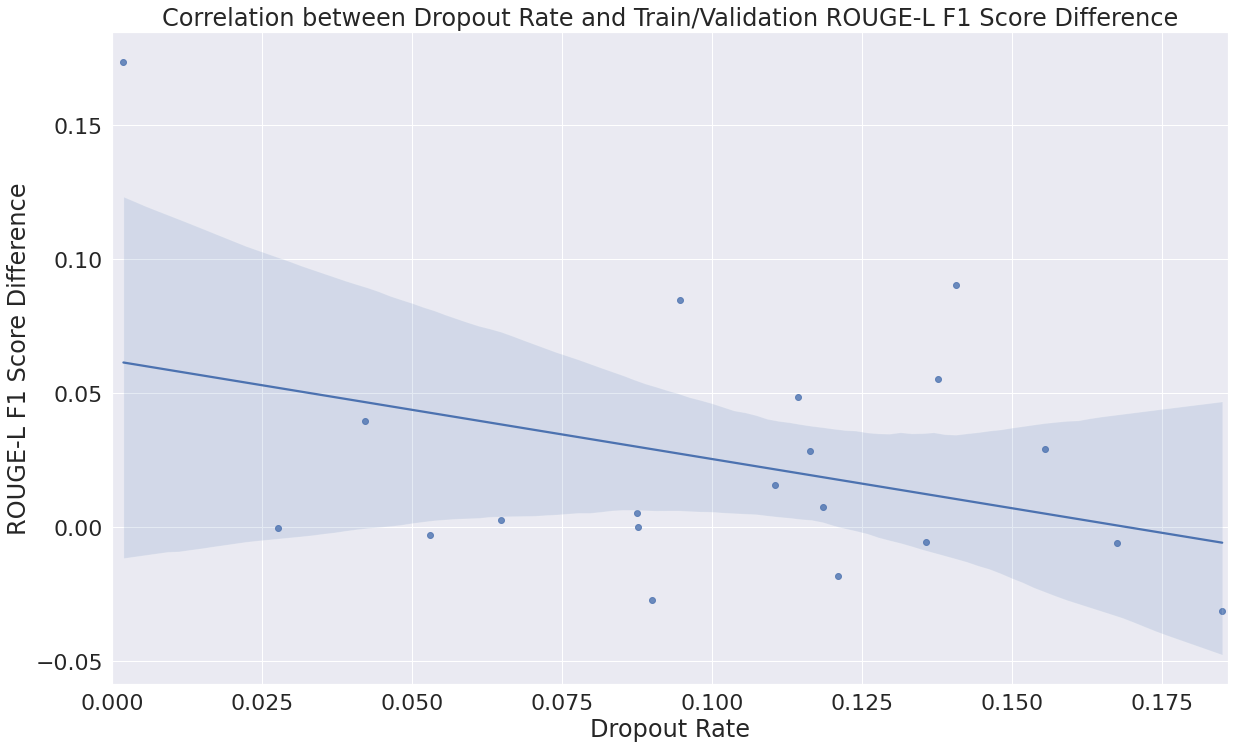

In [23]:
sns.set(font_scale=2)
regplot = sns.regplot(df_train_test_diff['dropout_rate'], df_train_test_diff['diff'])
regplot.axes.set_xlim(0,df_train_test_diff['dropout_rate'].max() + 0.001)

plt.title('Correlation between Dropout Rate and Train/Validation ROUGE-L F1 Score Difference')
plt.xlabel('Dropout Rate')
plt.ylabel('ROUGE-L F1 Score Difference')

In [24]:
print('Top 5 experiments with largest train vs validation score difference:')
df_train_test_diff.head(5)

Top 5 experiments with largest train vs validation score difference:


,id,train_score,test_score,dropout_rate,batch_size,diff
0,#16,0.683786,0.509957,0.001871,256.0,0.173830
0,#18,0.679979,0.589666,0.140747,256.0,0.090312
0,#5,0.650460,0.565396,0.094720,512.0,0.085064
0,#14,0.584865,0.529626,0.137732,128.0,0.055239
0,#19,0.550053,0.501251,0.114450,128.0,0.048801


In [41]:
print('Top 5 experiments with smallest train vs validation score difference:')
df_train_test_diff.tail(5).iloc[::-1]

Top 5 experiments with smallest train vs validation score difference:


,id,train_score,test_score,dropout_rate,batch_size,diff
0,#2,0.339074,0.370416,0.185119,64.0,-0.031342
0,#7,0.326183,0.353147,0.089990,64.0,-0.026964
0,#13,0.513508,0.531688,0.120969,32.0,-0.018180
0,#12,0.447714,0.453604,0.167589,64.0,-0.005890
0,#4,0.523776,0.529125,0.135776,256.0,-0.005349


In [27]:
df_plot.columns
[16, 18, 5, 14, 19]

Index(['epoch', 'rs_1_09 - test_rouge_L_f1', 'rs_1_08 - test_rouge_L_f1',
       'rs_1_13 - test_rouge_L_f1', 'rs_1_12 - test_rouge_L_f1',
       'rs_1_11 - test_rouge_L_f1', 'rs_1_10 - test_rouge_L_f1',
       'rs_1_07 - test_rouge_L_f1', 'rs_1_06 - test_rouge_L_f1',
       'rs_1_05 - test_rouge_L_f1', 'rs_1_04 - test_rouge_L_f1',
       'rs_1_19 - test_rouge_L_f1', 'rs_1_18 - test_rouge_L_f1',
       'rs_1_17 - test_rouge_L_f1', 'rs_1_16 - test_rouge_L_f1',
       'rs_1_15 - test_rouge_L_f1', 'rs_1_14 - test_rouge_L_f1',
       'rs_1_03 - test_rouge_L_f1', 'rs_1_02 - test_rouge_L_f1',
       'rs_1_01 - test_rouge_L_f1', 'rs_1_00 - test_rouge_L_f1',
       'rs_1_09 - rouge_L_f1', 'rs_1_08 - rouge_L_f1', 'rs_1_13 - rouge_L_f1',
       'rs_1_12 - rouge_L_f1', 'rs_1_11 - rouge_L_f1', 'rs_1_10 - rouge_L_f1',
       'rs_1_07 - rouge_L_f1', 'rs_1_06 - rouge_L_f1', 'rs_1_05 - rouge_L_f1',
       'rs_1_04 - rouge_L_f1', 'rs_1_19 - rouge_L_f1', 'rs_1_18 - rouge_L_f1',
       'rs_1_17 - rouge_L

In [32]:
any(map(lambda x: x > 2, [1, 2]))

False

The top 5 most overfitting experiments


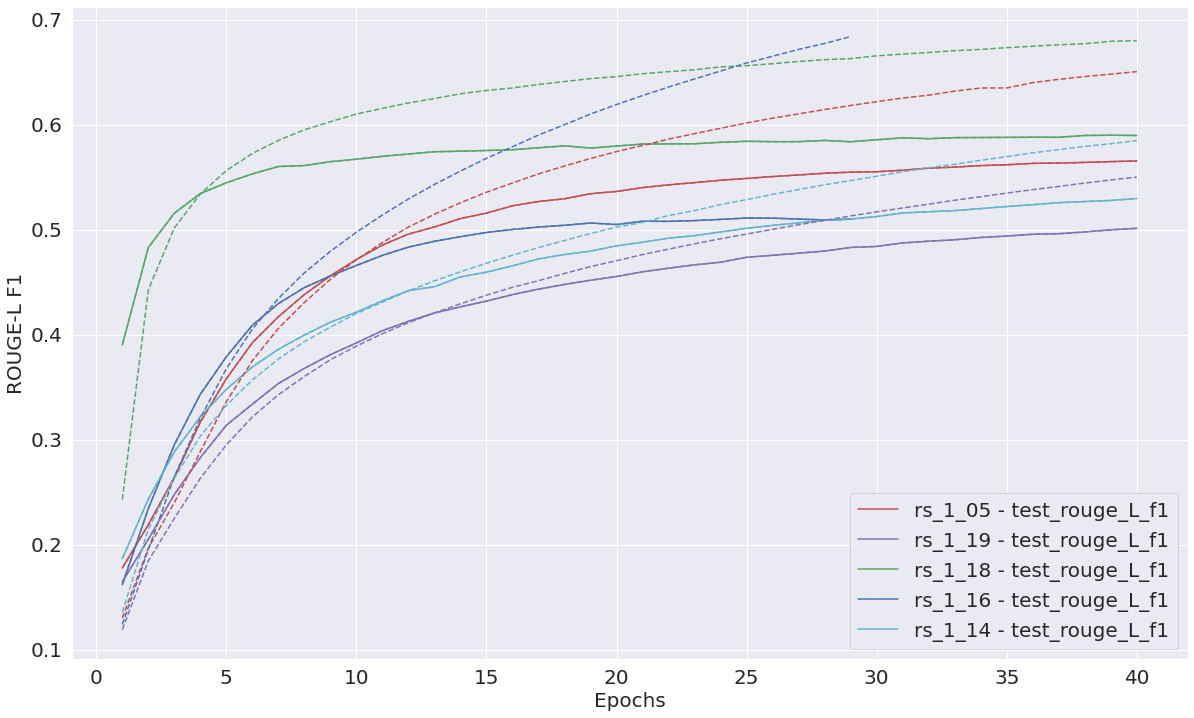

In [52]:
# experiment_ids is a dict with experiment ids as keys and corresponding colors as values
def plot_learning_curves(df, experiment_ids, metrics=['test_rouge_L_f1', 'rouge_L_f1']):
    linestyles = ['solid', 'dashed']
    xs = df['epoch']
    labels = []
    
    for i, metric in enumerate(metrics):
        for column in df.columns:
            matching_experiment_ids = [id for id in experiment_ids.keys() if id in column]
            if metric in column and len(matching_experiment_ids) > 0:
                matching_experiment_id = matching_experiment_ids[0]
                color = experiment_ids[matching_experiment_id]
                ys = df[column]
                plt.plot(xs, ys, linestyle=linestyles[i], color=color)
                
                if i == 0:
                    labels.append(column)

                    
    plt.xlabel('Epochs', fontsize=20)
    plt.xticks(fontsize=20)
    
    plt.ylabel('ROUGE-L F1', fontsize=20)
    plt.yticks(fontsize=20)

                
    plt.grid(True)
    plt.legend(labels=labels, fontsize=20, loc='lower right')
    
experiment_ids = {'16': 'b', '18': 'g', '05': 'r', '14': 'c', '19': 'm'}
print('The top 5 most overfitting experiments')
plot_learning_curves(df_plot, experiment_ids)

The 5 least overfitting experiments


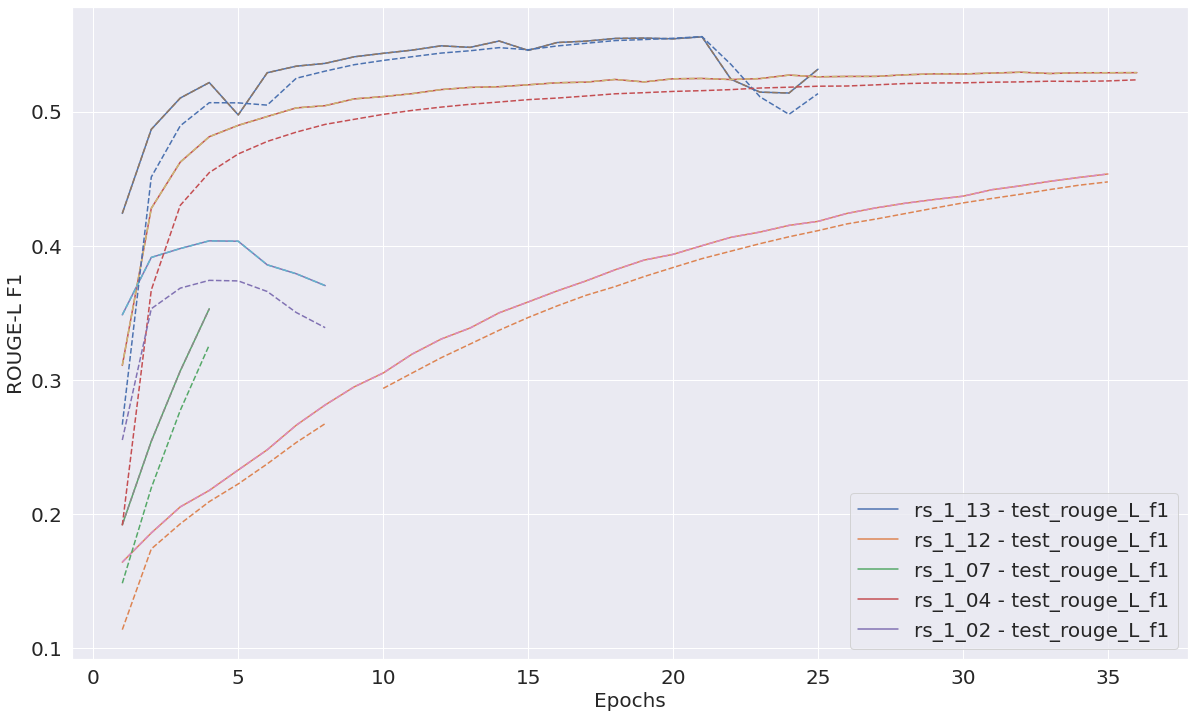

In [46]:
print('The 5 least overfitting experiments')
plot_learning_curves(df_plot, ['02', '07', '13', '12', '04'])